In [3]:
import numpy as np
import seaborn as sns
from scipy.stats import chi2
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,6)

## Testing goodness-of-fit

In 2008 the producer of M&Ms stopped publishing the colors distribution of M&Ms. Here are the last percentages published in 2008:

| Blue | Organge | Green | Yellow | Red | Brown |
|:---:|:---:|:---:|:---:|:---:|:---:|
| 24% | 20% | 16% | 14% | 13% | 13% |

Recently, students in my class inspected the contents of one bag of milk chocolate M&Ms and gost the following counts:

| Blue | Orange | Green | Yellow | Red | Brown
|:---:|:---:|:---:|:---:|:---:|:---:|
| 85 | 79 | 56 | 64 | 58 | 68

Are these counts consistent with the last published percentages? Or is there sufficient evidence to claim that the color distribution is now different?

This question requires a **test of goodness-of-fit** for the six categories.

$H_0$: "nothing is extraordinary is going on" = the color distribution is given by the table from 2008.

$H_A:$ the color distribution is different from the 2008 table

The ideia is to compare the observed counts to the numbers one would expect if $H_0$ is true.

To compute the expected counts, note that we have a total of 410 M&Ms. So on $H_0$ we expect $24\% \times 410 = 98.4$ blue M&Ms. After doing this computation for the other colors, we get a table of observed and expected counts:


| | Blue | Orange | Green | Yellow | Red | Brown
| :---: |:---:|:---:|:---:|:---:|:---:|:---:|
| Observed | 85 | 79 | 56 | 64 | 58 | 68 |
| Expected | 98.4 | 82 | 65.6 | 57.4 | 53.3 | 53.3 |

Next we combine the differences between observed and expected counts across all six categories:

$$\chi^2 = \sum_{all~categories} \frac{(observed - expected)^2}{expected}$$

$$=\frac{(85-98.4)^2}{98.4} + \frac{(79-82)^2}{82} + ...+ \frac{(68-53.3)^2}{53.3} = 8.57$$

Large values of the chi-square statistic $\chi^2$ are evidence against $H_0$. The p-value is the *right* tail of the $\chi^2$ distribution with $\underline{degrees~of~freedom} = \underline{number~of categories} - 1 = 5$.

For the ${\chi^2{-statistic}}$ (8.57) the p-value is 12.71%, so we don't have sufficient evidence to reject the null hypothesis

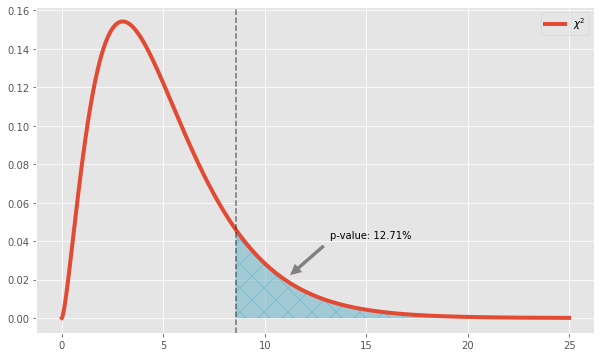

In [23]:

df = 5
x = np.arange(0, 25, 0.01)
y = chi2.pdf(x, df)
ax = sns.lineplot(x=x, y=y, label=r"$\chi^2$", linewidth=4)

# Plot the vertical line
_ = ax.axvline(8.57, color='k', alpha=0.5, linestyle='--')

# Plot the text
_ = ax.annotate(f"p-value: {y[x>8.57].sum():0.2f}%", xy=(11,0.02), xycoords='data',
            xytext=(0.6, 0.3), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.1),
            horizontalalignment='center', verticalalignment='center',
            )

# Plot hatched area
_ = ax.fill_between(x, y, where=(x > 8.57) , interpolate=True, color='#5fb0c7', hatch= 'x', alpha=0.50)

This $\chi^2$-test is applicable if the observed data are counts that were obtained by drawing the M&Ms independently from the population of M&Ms - it is plausible that filling the M&Ms into bags follows approximately this process.

Blue M&Ms were not introduced until 1995. Initially some people suspected that there were fewer blue M&Ms in a bag than advertised. Note that testing the proportion of one category can be done with the z-test. The chi-square test provides an extension of the z-test to testing several categories.